# Big data mart sales predictioin model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Description 

####  Big Data Mart Sales Problem
Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

## Import Data

In [2]:
test_link = 'https://raw.githubusercontent.com/Bhushan0130/Datasets/main/bigdatamart_Test.csv'
train_link = 'https://raw.githubusercontent.com/Bhushan0130/Datasets/main/bigdatamart_Train.csv'
test = pd.read_csv(test_link)
train = pd.read_csv(train_link)
print('Shape of Test: ', test.shape)
print('Shape of Train: ', train.shape)

# Shape of Test:  (5681, 11)
# Shape of Train:  (8523, 12)

Shape of Test:  (5681, 11)
Shape of Train:  (8523, 12)


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
train.head() # Top 5 rows

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
train.sample(4)   # 4 Sample of rows (randomly)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3075           FDG60        20.35          Low Fat         0.060700   
932            FDX50        20.10          Low Fat         0.074613   
2235           FDE47        14.15          Low Fat         0.038123   
7287           FDX55          NaN          Low Fat         0.096658   

                  Item_Type  Item_MRP Outlet_Identifier  \
3075           Baking Goods  233.3616            OUT046   
932                   Dairy  108.7228            OUT035   
2235          Starchy Foods  123.5046            OUT017   
7287  Fruits and Vegetables  216.9166            OUT019   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3075                       1997       Small               Tier 1   
932                        2004       Small               Tier 2   
2235                       2007         NaN               Tier 2   
7287                       1985       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
3075  Supermarket Type1          6093.4016  
932   Supermarket Type1          1215.7508  
2235  Supermarket Type1          1992.0736  
7287      Grocery Store           217.7166

In [5]:
train.tail() # 5 Button rows

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

               Item_Type  Item_MRP Outlet_Identifier  \
8518         Snack Foods  214.5218            OUT013   
8519        Baking Goods  108.1570            OUT045   
8520  Health and Hygiene   85.1224            OUT035   
8521         Snack Foods  103.1332            OUT018   
8522         Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700

## Checking dtypes of the columns 

In [6]:
train.dtypes

# Item_Identifier               object
# Item_Weight                  float64
# Item_Fat_Content              object
# Item_Visibility              float64
# Item_Type                     object
# Item_MRP                     float64
# Outlet_Identifier             object
# Outlet_Establishment_Year      int64
# Outlet_Size                   object
# Outlet_Location_Type          object
# Outlet_Type                   object
# Item_Outlet_Sales            float64

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
train.info()

#  #   Column                     Non-Null Count  Dtype  
# ---  ------                     --------------  -----  
#  0   Item_Identifier            8523 non-null   object 
#  1   Item_Weight                7060 non-null   float64
#  2   Item_Fat_Content           8523 non-null   object 
#  3   Item_Visibility            8523 non-null   float64
#  4   Item_Type                  8523 non-null   object 
#  5   Item_MRP                   8523 non-null   float64
#  6   Outlet_Identifier          8523 non-null   object 
#  7   Outlet_Establishment_Year  8523 non-null   int64  
#  8   Outlet_Size                6113 non-null   object 
#  9   Outlet_Location_Type       8523 non-null   object 
#  10  Outlet_Type                8523 non-null   object 
#  11  Item_Outlet_Sales          8523 non-null   float64
# dtypes: float64(4), int64(1), object(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##  Null Value Analysis

In [8]:
train.isnull().sum()

# Item_Identifier                 0
# Item_Weight                  1463
# Item_Fat_Content                0
# Item_Visibility                 0
# Item_Type                       0
# Item_MRP                        0
# Outlet_Identifier               0
# Outlet_Establishment_Year       0
# Outlet_Size                  2410
# Outlet_Location_Type            0
# Outlet_Type                     0
# Item_Outlet_Sales               0

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

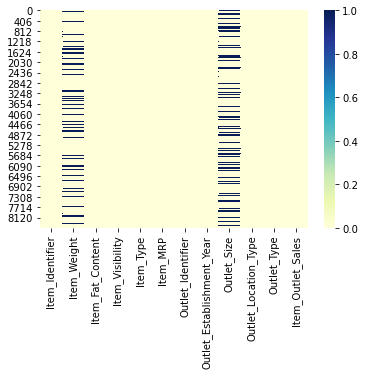

In [9]:
sns.heatmap(train.isnull(),cmap="YlGnBu" )

<AxesSubplot:>

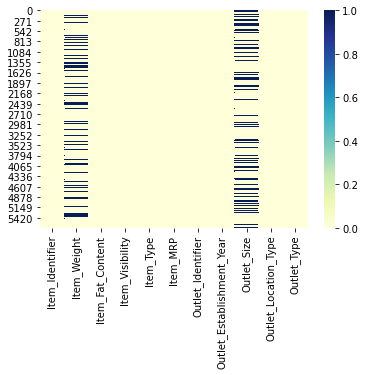

In [10]:
sns.heatmap(test.isnull(),cmap="YlGnBu" )

In [11]:
null_value_per = train.isnull().sum() / train.shape[0] * 100  # Null value percentage
null_value_per


# Item_Identifier               0.000000
# Item_Weight                  17.165317
# Item_Fat_Content              0.000000
# Item_Visibility               0.000000
# Item_Type                     0.000000
# Item_MRP                      0.000000
# Outlet_Identifier             0.000000
# Outlet_Establishment_Year     0.000000
# Outlet_Size                  28.276428
# Outlet_Location_Type          0.000000
# Outlet_Type                   0.000000
# Item_Outlet_Sales             0.000000
# dtype: float64

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [12]:
null_value_per[null_value_per > 20]

# Outlet_Size    28.276428
# dtype: float64

Outlet_Size    28.276428
dtype: float64

In [13]:
# As we can observe Item_outlet_sales and outlet_size columns have null value which are greater than 20%
# but Item_outlet_sales is our target variable
# therefore we need to delete only Outle_size columns

In [14]:
train.dtypes   #  Outlet_size columns is of object type

# Item_Identifier               object
# Item_Weight                  float64
# Item_Fat_Content              object
# Item_Visibility              float64
# Item_Type                     object
# Item_MRP                     float64
# Outlet_Identifier             object
# Outlet_Establishment_Year      int64
# Outlet_Size                   object
# Outlet_Location_Type          object
# Outlet_Type                   object
# Item_Outlet_Sales            float64

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [15]:
test.isnull().sum()

# Item_Identifier                 0
# Item_Weight                   976
# Item_Fat_Content                0
# Item_Visibility                 0
# Item_Type                       0
# Item_MRP                        0
# Outlet_Identifier               0
# Outlet_Establishment_Year       0
# Outlet_Size                  1606
# Outlet_Location_Type            0
# Outlet_Type                     0

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [16]:
null_value_per = test.isnull().sum() / test.shape[0] * 100
null_value_per

# Item_Identifier               0.000000
# Item_Weight                  17.180074
# Item_Fat_Content              0.000000
# Item_Visibility               0.000000
# Item_Type                     0.000000
# Item_MRP                      0.000000
# Outlet_Identifier             0.000000
# Outlet_Establishment_Year     0.000000
# Outlet_Size                  28.269671
# Outlet_Location_Type          0.000000
# Outlet_Type                   0.000000

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [17]:
# train and test data is containing 28.26 % blank value in the dataframe 
# therefore we need to delete this column from each data set for best model learning

In [18]:
print('Shape of train data', train.shape)
print('Shape of test data', test.shape)

Shape of train data (8523, 12)
Shape of test data (5681, 11)


In [19]:
# ------------ Outlet_Size column deleted from each dataset (test and train dataset)

train.drop(columns = 'Outlet_Size', axis = 1, inplace = True)
test.drop(columns = 'Outlet_Size', axis = 1, inplace = True)

print('Shape of train data', train.shape)
print('Shape of test data', test.shape)

# Shape of train data (8523, 11)
# Shape of test data (5681, 10)

Shape of train data (8523, 11)
Shape of test data (5681, 10)


<AxesSubplot:>

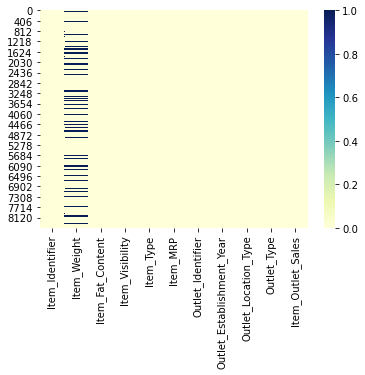

In [20]:
sns.heatmap(train.isnull(),cmap="YlGnBu" )

<AxesSubplot:>

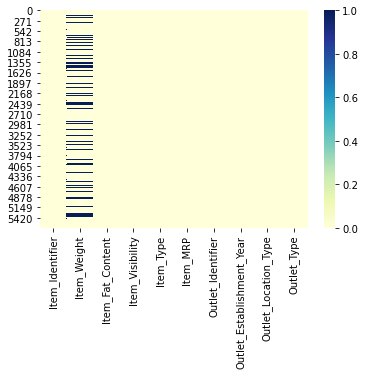

In [21]:
sns.heatmap(test.isnull(),cmap="YlGnBu" )

In [22]:
train.isnull().sum()  # Item_Weight  : 1463

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [23]:
test.isnull().sum()  # Item_Weight  : 976

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

## Imputation of Null values

In [24]:
mean_train = train.copy()
median_train = train.copy()

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

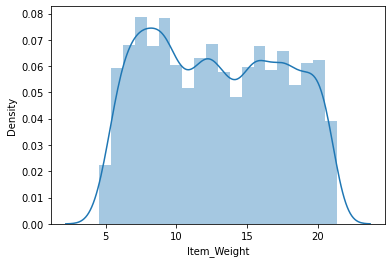

In [25]:
sns.distplot(train['Item_Weight'])  
# data is not normally distributed therefore, for imputation median will work fine
# Lets check

### Mean imputation

In [26]:
mean_train['Item_Weight'] = mean_train['Item_Weight'].fillna(mean_train['Item_Weight'].mean())

In [27]:
print('Shape of mean_train', mean_train.shape)
print('Null value in mean_train', mean_train.isnull().sum().sum() )

# Shape of mean_train (8523, 11)
# Null value mean_train 0

Shape of mean_train (8523, 11)
Null value in mean_train 0


In [28]:
mean_train['Item_Weight'].mean()
# 12.857645184136409

12.857645184136409

## Median Imputation

In [29]:
train.isnull().sum().sum()
# 1463

1463

In [30]:
median_train['Item_Weight'] = median_train['Item_Weight'].fillna(median_train['Item_Weight'].median())

In [31]:
print('Shape of median_train', median_train.shape)
print('Shape of median_train', median_train.isnull().sum().sum() )

# Shape of median_train (8523, 11)
# Shape of median_train 0

Shape of median_train (8523, 11)
Shape of median_train 0


In [32]:
median_train['Item_Weight'].median()

# 12.6

12.6

### Analysis of imputed value impect

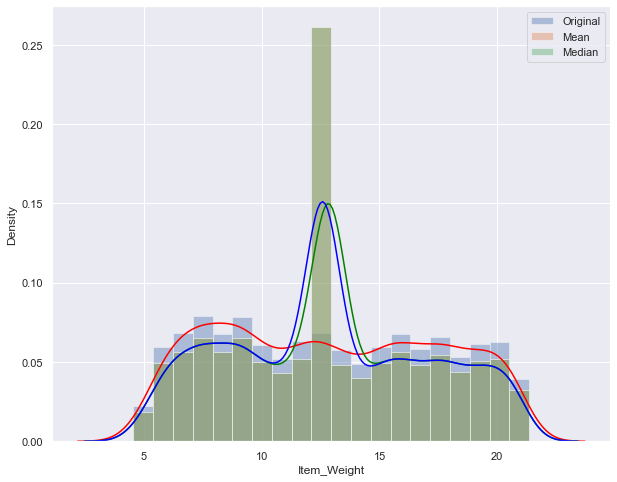

In [33]:
plt.figure(figsize = (10, 8))
sns.set()
   
sns.distplot(train['Item_Weight'], bins = 20, kde_kws = { 'color' : 'red' }, label = "Original")
sns.distplot(mean_train['Item_Weight'], bins = 20, kde_kws = {'color' : 'green' }, label = 'Mean')
sns.distplot(median_train['Item_Weight'], bins = 20, kde_kws = {'color' : 'blue' }, label = 'Median')
plt.legend()
# sns.distplot(median_train['Item_Weight'], bins = 20, kde_kws = {'linewidth' : 2, 'color' : 'black' }, label = 'Mean')

In [34]:
# As we can see, distribution plot of Item_Weight is almost similar in both case meadian and mean case
# theirfore, we can apply mean or median any one of them
# this imputation operation increase data distribution towards normal distribution

### Apply to original Dataset (Imputing meadina value in train and test data)

In [35]:
train.isnull().sum().sum()
# 1463

1463

In [36]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].median())
train.isnull().sum().sum()
# 0

0

In [37]:
test['Item_Weight'] = test['Item_Weight'].fillna(train['Item_Weight'].median())
test.isnull().sum().sum()
# 0

0

<AxesSubplot:>

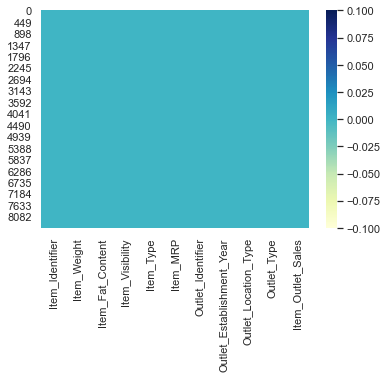

In [38]:
sns.heatmap(train.isnull(),cmap="YlGnBu" )  # No null value present in dataset

<AxesSubplot:>

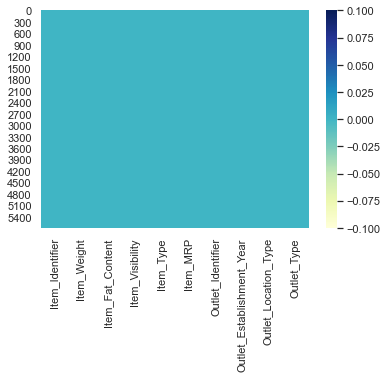

In [39]:
sns.heatmap(test.isnull(),cmap="YlGnBu" )   # No null value present in test dataset

In [40]:
# As visulized above, now no null value is present in the train and test data

## Data Preprocessing

In [41]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

### Creation of new variables

In [42]:
train['Item_type'] = train['Item_Identifier'].apply(lambda x: x[:2])
test['Item_type'] = test['Item_Identifier'].apply(lambda x: x[:2])

In [43]:
# train['Item_type']
# test['Item_type']
train['Item_type'].value_counts()


# FD    6125
# NC    1599
# DR     799
# Name: Item_type, dtype: int64

FD    6125
NC    1599
DR     799
Name: Item_type, dtype: int64

### dealing with Item_fat_content column

In [44]:
train['Item_Fat_Content'].value_counts()

# Low Fat    5089
# Regular    2889
# LF          316
# reg         117
# low fat     112
# Name: Item_Fat_Content, dtype: int64

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [45]:
# As we can see Low Fat and LF is same
# Regular and reg is same 
# Now, we will make change accordingly 

In [46]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg' : 'Regular', 'low fat': 'Low Fat'   })
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg' : 'Regular', 'low fat': 'Low Fat'   })

In [47]:
train['Item_Fat_Content'].value_counts()

# Low Fat    5517
# Regular    3006
# Name: Item_Fat_Content, dtype: int64

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [48]:
test['Item_Fat_Content'].value_counts()

# Low Fat    3668
# Regular    2013
# Name: Item_Fat_Content, dtype: int64

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

### Dealing with Outlet establishment year

In [49]:
# updating establishment year
# The data scientists at BigMart have collected 2013 sales data, 
# hence we can calculate outlet years 

In [50]:
train['Outlet_Year'] = 2013 - train['Outlet_Establishment_Year']
test['Outlet_Year'] = 2013 - test['Outlet_Establishment_Year']

In [51]:
train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Location_Type        Outlet_Type  \
0                       1999               Tier 1  Supermarket Type1   
1                       2009               Tier 3  Supermarket Type2   
2                       1999               Tier 1  Supermarket Type1   
3                       1998               Tier 3      Grocery Store   
4                       1987               Tier 3  Supermarket Type1   

   Item_Outlet_Sales Item_type  Outlet_Year  
0          3735.1380        FD           14  
1           443.4228        DR            4  
2          2097.2700        FD           14  
3           732.3800        FD           15  
4           994.7052        NC           26

In [52]:
print(train.shape)
print(test.shape)

# (8523, 13)
# (5681, 12)

(8523, 13)
(5681, 12)


## Droping Un-necessary columns

In [53]:
# From item_identifier column we have created item_type and from outlet_establishment_year, we have created outlet year columns
# outlet_establishment_year was showing so high value, which may lead to create bad model, therefore converted that into outlet_year 

In [54]:
drop_col = ['Item_Identifier', 'Outlet_Establishment_Year']
train.drop(columns = drop_col, inplace = True)
test.drop(columns = drop_col, inplace = True)
print(train.shape)
print(test.shape)

# (8523, 11)
# (5681, 10)

(8523, 11)
(5681, 10)


In [55]:
train.head(2)

Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP  \
0         9.30          Low Fat         0.016047        Dairy  249.8092   
1         5.92          Regular         0.019278  Soft Drinks   48.2692   

  Outlet_Identifier Outlet_Location_Type        Outlet_Type  \
0            OUT049               Tier 1  Supermarket Type1   
1            OUT018               Tier 3  Supermarket Type2   

   Item_Outlet_Sales Item_type  Outlet_Year  
0          3735.1380        FD           14  
1           443.4228        DR            4

In [56]:
test.head(2)

Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP  \
0        20.75          Low Fat         0.007565  Snack Foods  107.8622   
1         8.30          Regular         0.038428        Dairy   87.3198   

  Outlet_Identifier Outlet_Location_Type        Outlet_Type Item_type  \
0            OUT049               Tier 1  Supermarket Type1        FD   
1            OUT017               Tier 2  Supermarket Type1        FD   

   Outlet_Year  
0           14  
1            6

## Outliers Analysis: 

In [57]:
float_col = train.select_dtypes(include = 'float').keys()
float_col

# ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

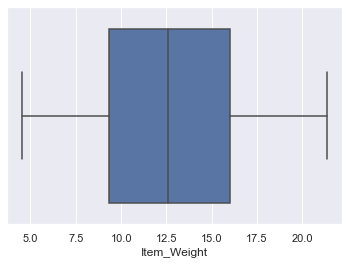

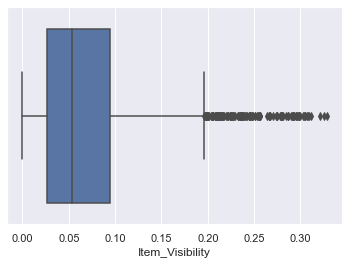

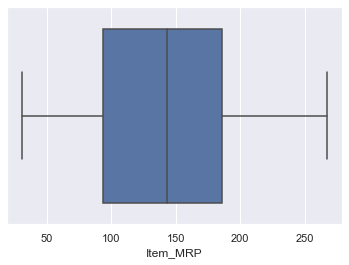

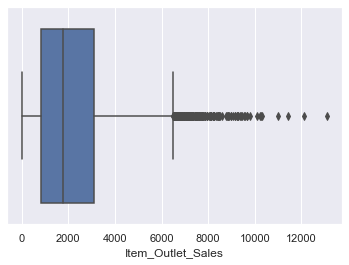

In [58]:
for i in float_col:
    plt.figure()
    sns.boxplot(train[i])   # Boxplot

In [59]:
# Outliers are present in Item_Visibility and target column only
# other 2 columns are free from outliers

## Skewness Analysis

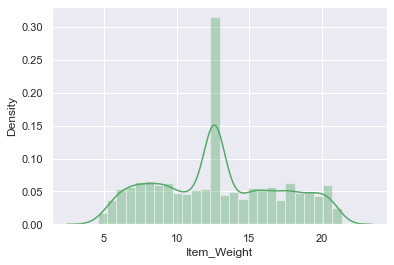

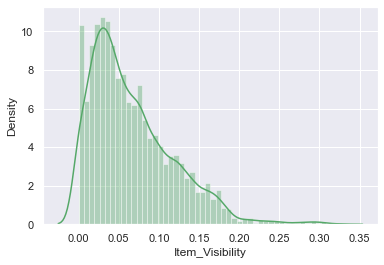

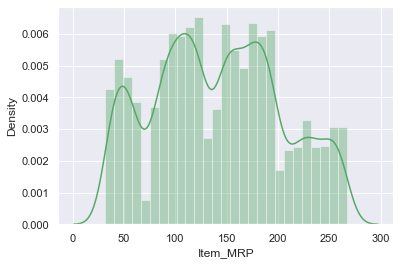

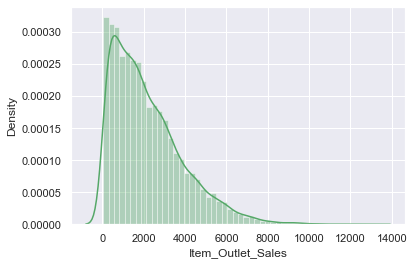

In [60]:
for i in float_col:
    plt.figure()
    sns.distplot(train[i], color = 'g')
   # Every columns containing skewness
    # Need to work on it

## Checking the distribution of the continuous value columns

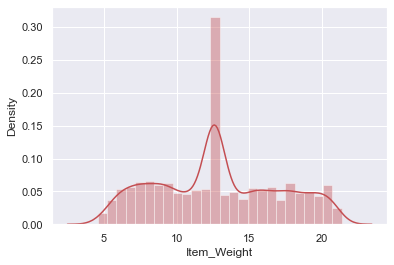

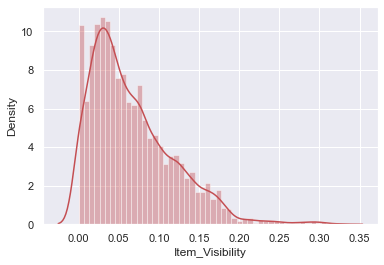

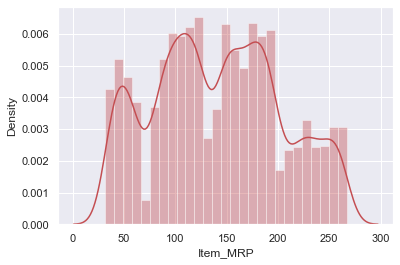

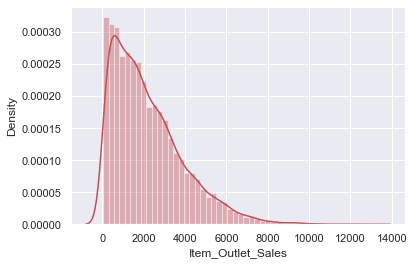

In [61]:
for i in float_col:
    plt.figure()
    sns.distplot(train[i], kde = True, color = 'r')
    # Item_visibiliy column is not normal distributed skewness is present this column
    # Other columns are also not showing normal distributed data 

## Checking the spread of columns of the data

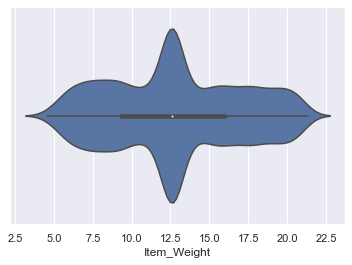

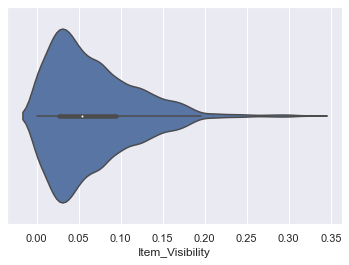

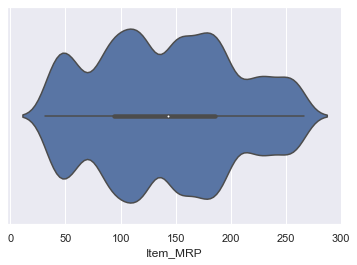

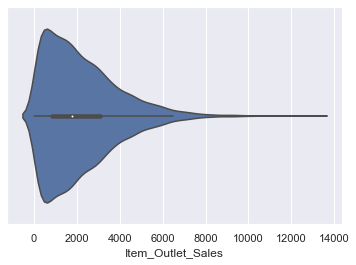

In [62]:
for i in float_col:    
    plt.figure()
    sns.violinplot(train[i], orient = 'vertical')
    
    # As we can see item_weight and Item_MRP is well spreaded but item_visibility is less spreaded as compare
    # to other, and this column contain outliers too

## Checking pattern of data, how they are connected with each other

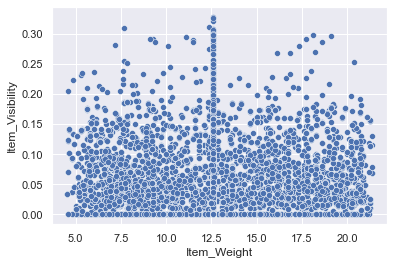

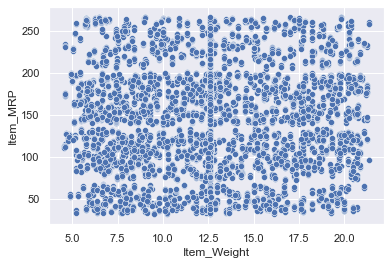

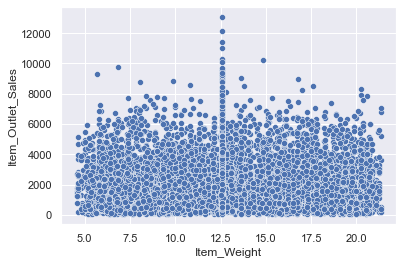

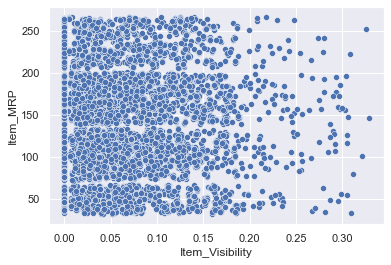

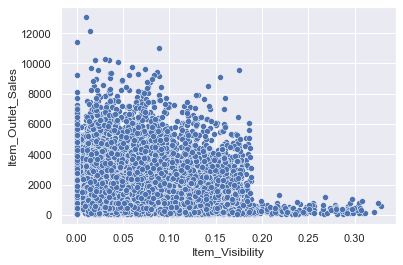

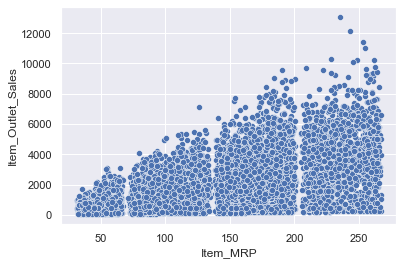

In [63]:
for i in range(len(float_col)):

    for j in float_col[i+1:]:    
        plt.figure()
        sns.scatterplot(train[float_col[i]], train[j])
        
        # No pattern we are able to find between columns
        # item_outlet_sale and MRP column behavour linearly only

In [64]:
train.dtypes

Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
Item_type                object
Outlet_Year               int64
dtype: object

#### Analysis for categorical columns

In [65]:
cat_col = train.select_dtypes(include = 'object').keys()
cat_col

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_type'],
      dtype='object')

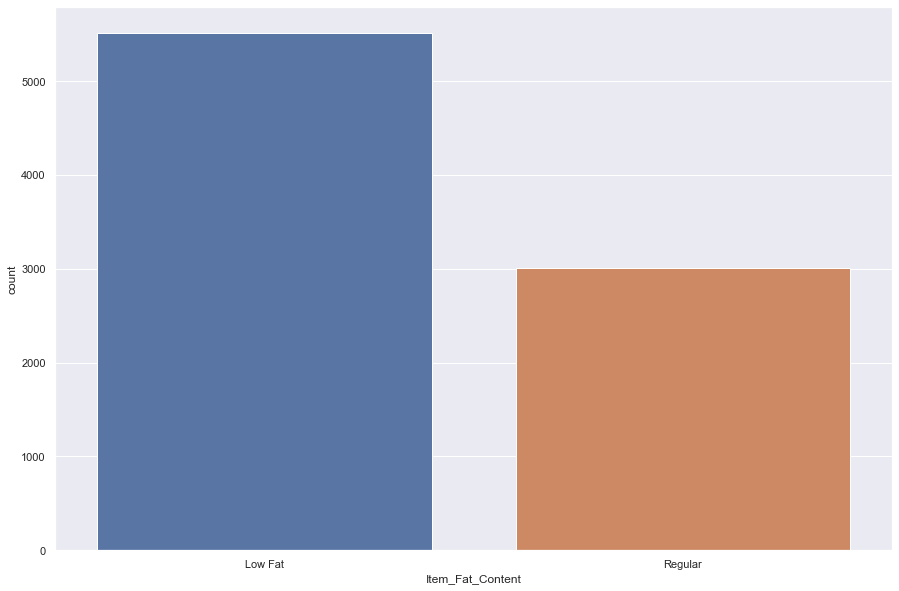

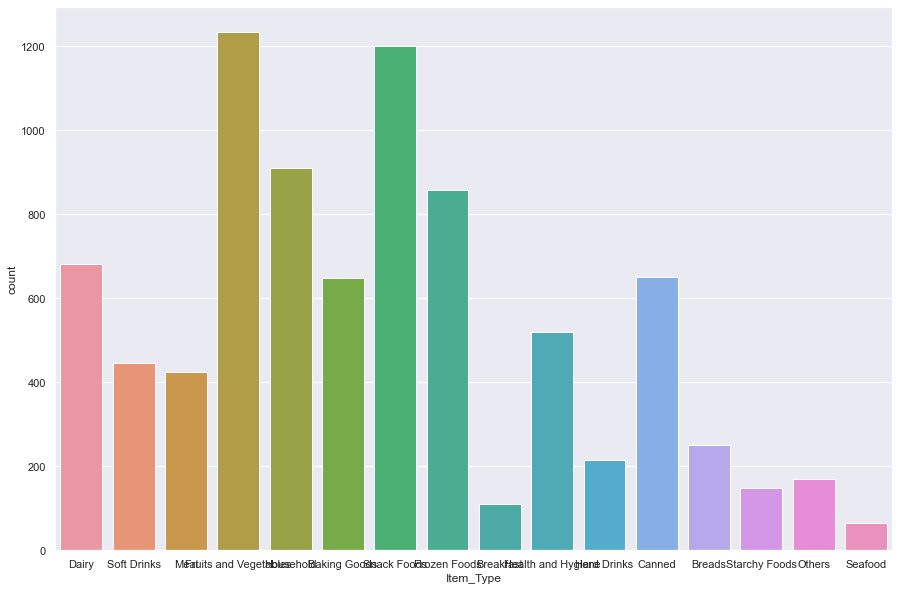

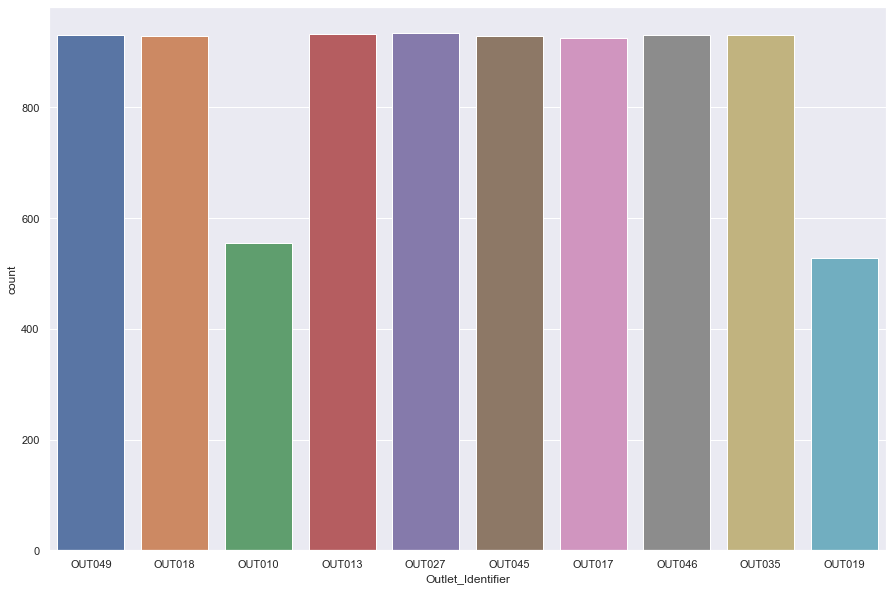

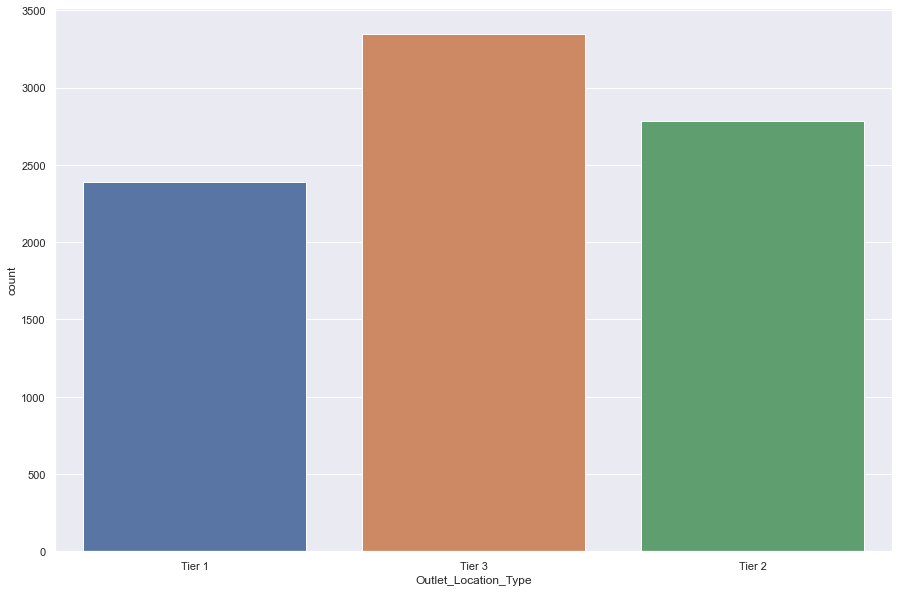

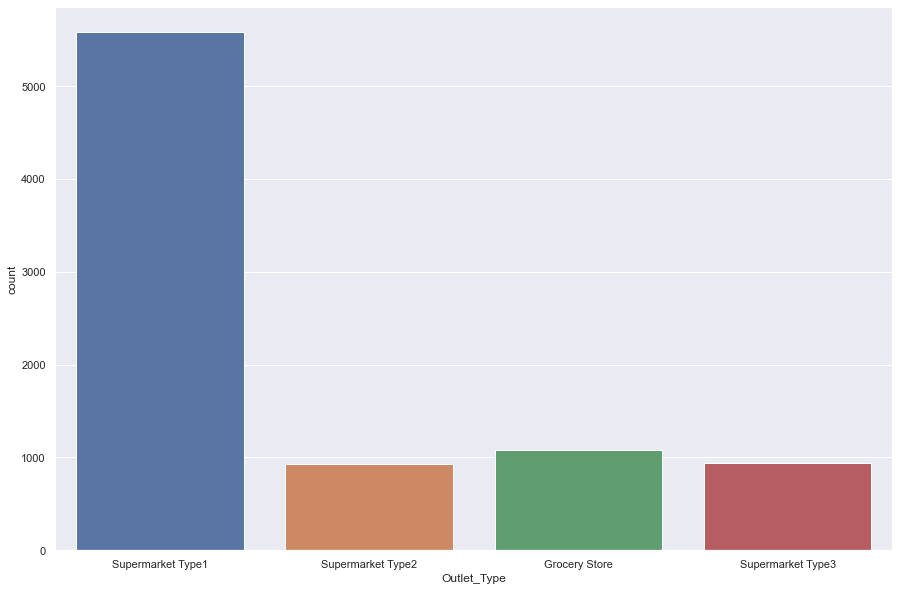

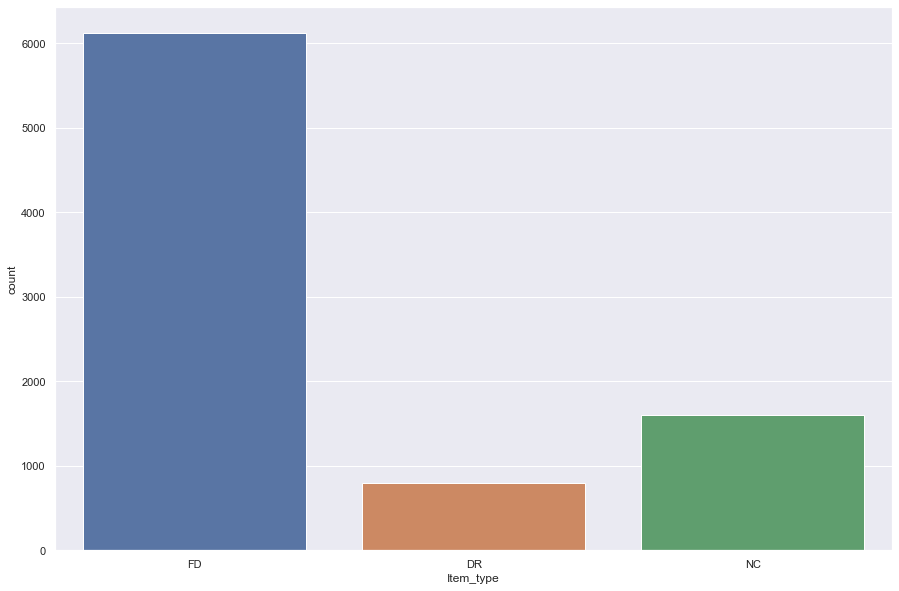

In [66]:
for i in cat_col:
    plt.figure(figsize = (15, 10))
    sns.countplot(train[i])

In [67]:
# for i in range(len(float_col)):
#     for j in float_col[i+1:]:    
#         plt.figure()
#         sns.swarmplot(df[float_col[i]], df[j])
        
#         this jypyter cell will take time

### Correlation of the columns

In [68]:
train.corr()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
Item_Weight           1.000000        -0.014168  0.024951           0.009693   
Item_Visibility      -0.014168         1.000000 -0.001315          -0.128625   
Item_MRP              0.024951        -0.001315  1.000000           0.567574   
Item_Outlet_Sales     0.009693        -0.128625  0.567574           1.000000   
Outlet_Year          -0.007739         0.074834 -0.005020           0.049135   

                   Outlet_Year  
Item_Weight          -0.007739  
Item_Visibility       0.074834  
Item_MRP             -0.005020  
Item_Outlet_Sales     0.049135  
Outlet_Year           1.000000

<AxesSubplot:>

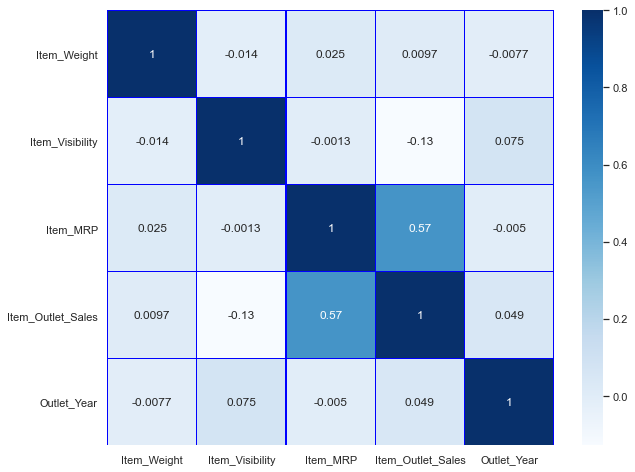

In [69]:
plt.figure(figsize = (10, 8))
sns.heatmap(train.corr(), annot = True, cmap = 'Blues', linewidth = 0.5, linecolor = 'blue' )   # Heatmap with number, 


In [70]:
# Item_MRP is highly correlated with item_outlet_sales
# outlet_Location_type and outlet_identifier

## Describe Data

In [71]:
train.describe()

Item_Weight  Item_Visibility     Item_MRP  Item_Outlet_Sales  \
count   8523.00000      8523.000000  8523.000000        8523.000000   
mean      12.81342         0.066132   140.992782        2181.288914   
std        4.22724         0.051598    62.275067        1706.499616   
min        4.55500         0.000000    31.290000          33.290000   
25%        9.31000         0.026989    93.826500         834.247400   
50%       12.60000         0.053931   143.012800        1794.331000   
75%       16.00000         0.094585   185.643700        3101.296400   
max       21.35000         0.328391   266.888400       13086.964800   

       Outlet_Year  
count  8523.000000  
mean     15.168133  
std       8.371760  
min       4.000000  
25%       9.000000  
50%      14.000000  
75%      26.000000  
max      28.000000

<AxesSubplot:>

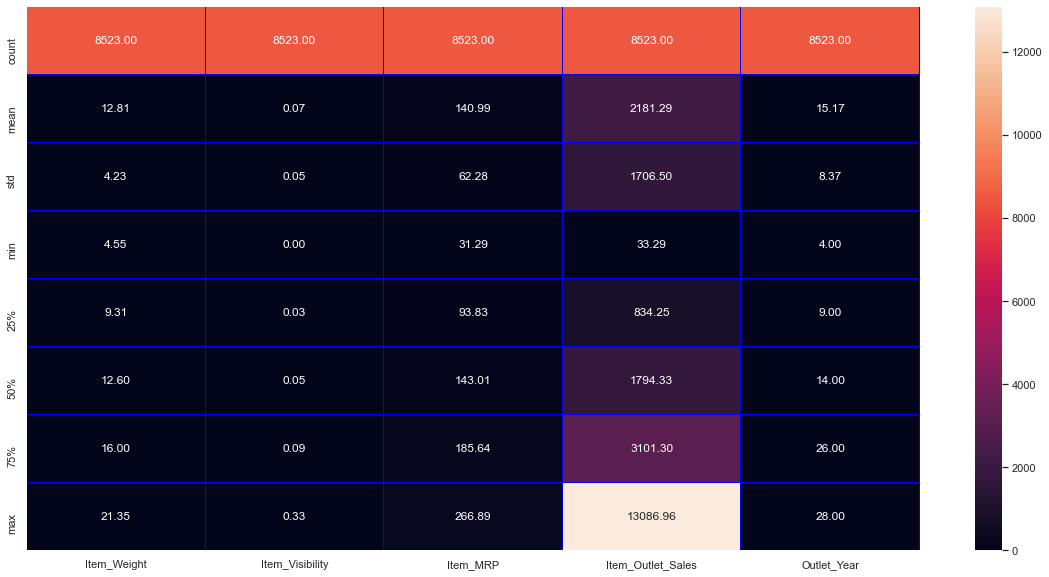

In [72]:
plt.figure(figsize = (20, 10))
sns.heatmap(train.describe(), annot = True, linewidth = 0.05, linecolor = 'blue', fmt = "0.2f")

In [73]:
# as we can see difference between 50 percentile and mean value of each columns indicating skewness
# item_MRP is highly spreaded as its min max difference is high
# count is equal for each column, indicate not null value present in the dataset
# as std is not zero for each column , which indicating data is not completely normal distributed

## Checking the columns which are positively and negative correlated with the target columns

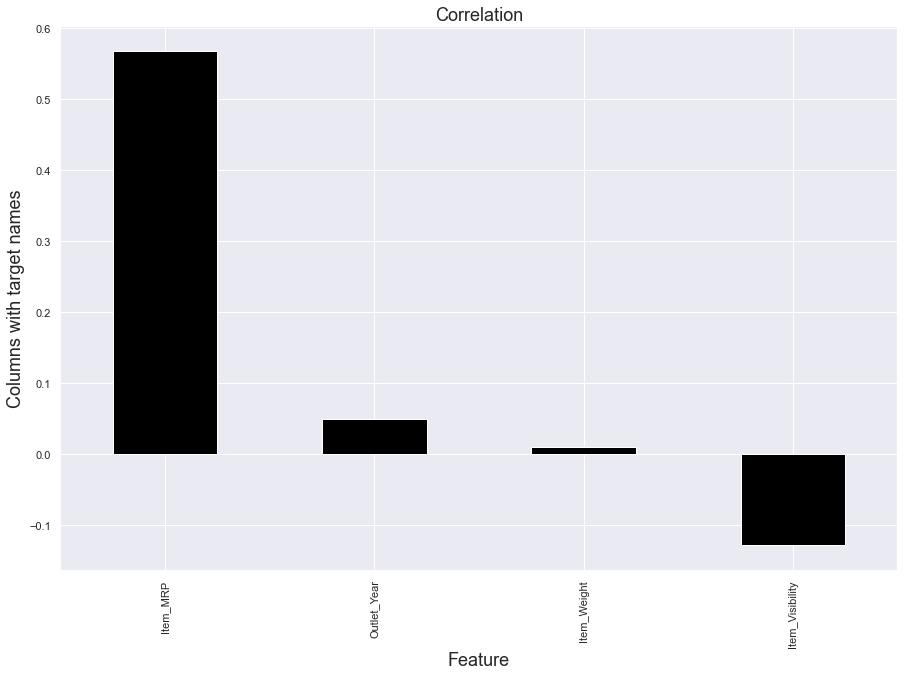

In [74]:
plt.figure(figsize = (15, 10))
train.corr()['Item_Outlet_Sales'].sort_values(ascending = False).drop(['Item_Outlet_Sales']).plot(kind = 'bar', color = 'black')
plt.xlabel( 'Feature', fontsize = 18)
plt.ylabel( 'Columns with target names', fontsize = 18)
plt.title ('Correlation', fontsize = 18)
plt.show()

In [75]:
# All columns are positively contributing towared target variable except item_visibilty
# Item_MRP and Outlet_type are highly contributing towards target variable

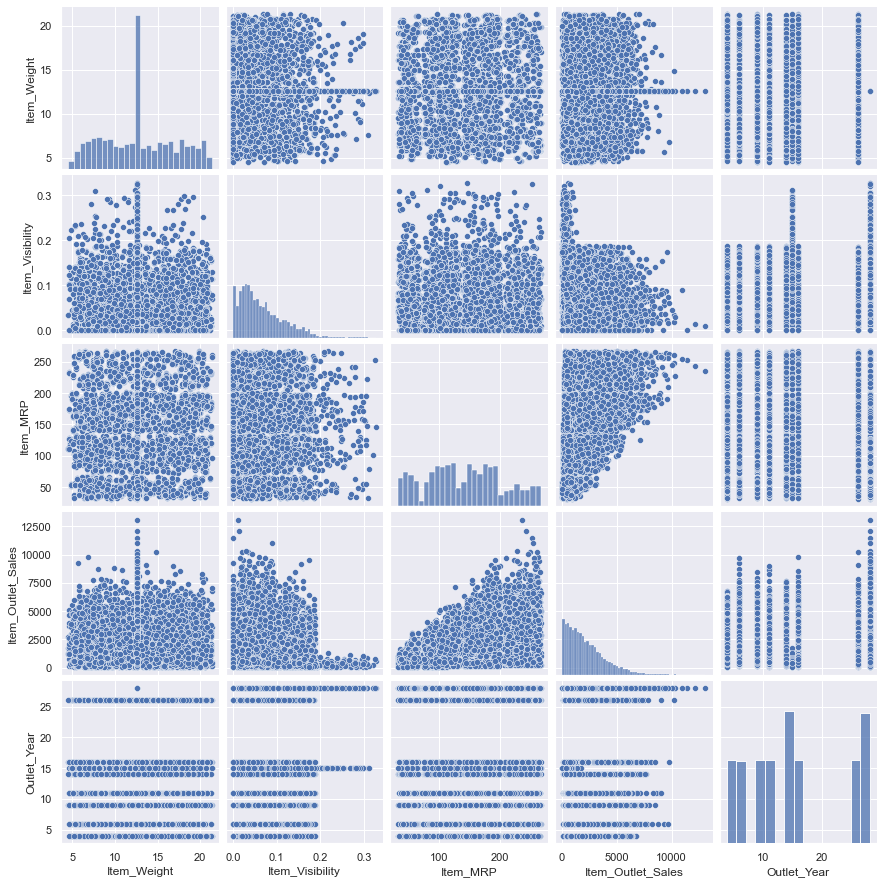

In [76]:
sns.pairplot(train)  # as we see data is spreaded randomly not pattern found
                    #  # only item_outlet_sale and item_MRP column behaving linearly

In [77]:
train.head(2)

Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP  \
0         9.30          Low Fat         0.016047        Dairy  249.8092   
1         5.92          Regular         0.019278  Soft Drinks   48.2692   

  Outlet_Identifier Outlet_Location_Type        Outlet_Type  \
0            OUT049               Tier 1  Supermarket Type1   
1            OUT018               Tier 3  Supermarket Type2   

   Item_Outlet_Sales Item_type  Outlet_Year  
0          3735.1380        FD           14  
1           443.4228        DR            4

## Changes in Target variable

In [78]:
# I have tried many times to set best model without transforming target variable, but fail to do that
# finally i applied log transformation on this because as target varaible is giving so high value
# and model is not able to predict that same therefore , we need to transform this variable to
# at the end after getting result we will convert this into normal form

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

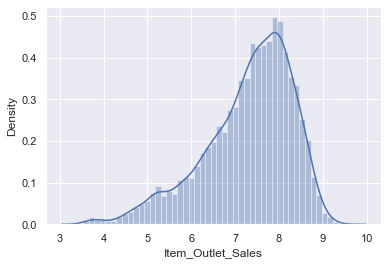

In [79]:
# Log transformation
train['Item_Outlet_Sales'] = np.log(1 + train['Item_Outlet_Sales'])
sns.distplot(train['Item_Outlet_Sales'])

In [80]:
# Now, Item_outliet_Sales is almost normally distributed, 
# which will leads to give good performance model

## Encoding

In [81]:
cat_col

# Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
#        'Outlet_Location_Type', 'Outlet_Type', 'Item_type'],
#       dtype='object')

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_type'],
      dtype='object')

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()   # created instance of labelencoder

In [83]:
for i in cat_col:
    
    le.fit(train[i])
    train[i]  = le.transform(train[i])
    test[i]  = le.transform(test[i])

In [84]:
train.head(2)

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0         9.30                 0         0.016047          4  249.8092   
1         5.92                 1         0.019278         14   48.2692   

   Outlet_Identifier  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  \
0                  9                     0            1           8.225808   
1                  3                     2            2           6.096776   

   Item_type  Outlet_Year  
0          1           14  
1          0            4

In [85]:
test.head(2)

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0        20.75                 0         0.007565         13  107.8622   
1         8.30                 1         0.038428          4   87.3198   

   Outlet_Identifier  Outlet_Location_Type  Outlet_Type  Item_type  \
0                  9                     0            1          1   
1                  2                     1            1          1   

   Outlet_Year  
0           14  
1            6

In [86]:
# Applying OneHotEncoding to increase model performance as i observed 

### OneHotEncoding

In [87]:
train['Item_Fat_Content'].value_counts()
for i in cat_col:
    print(i)
    print(train[i].value_counts())
    print('\n')

Item_Fat_Content
0    5517
1    3006
Name: Item_Fat_Content, dtype: int64


Item_Type
6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64


Outlet_Identifier
5    935
1    932
8    930
9    930
6    930
7    929
3    928
2    926
0    555
4    528
Name: Outlet_Identifier, dtype: int64


Outlet_Location_Type
2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64


Outlet_Type
1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64


Item_type
1    6125
2    1599
0     799
Name: Item_type, dtype: int64




In [88]:
# Item_Fat_Content
# Outlet_Location_Type
# Outlet_Type
# Item_type

# These metioned column have less unique value, therefore we can apply OneHotEncoding on it

In [89]:
train = pd.get_dummies(train, columns = ['Item_Fat_Content','Outlet_Location_Type', 'Outlet_Type', 'Item_type'  ])
train.head()

Item_Weight  Item_Visibility  Item_Type  Item_MRP  Outlet_Identifier  \
0         9.30         0.016047          4  249.8092                  9   
1         5.92         0.019278         14   48.2692                  3   
2        17.50         0.016760         10  141.6180                  9   
3        19.20         0.000000          6  182.0950                  0   
4         8.93         0.000000          9   53.8614                  1   

   Item_Outlet_Sales  Outlet_Year  Item_Fat_Content_0  Item_Fat_Content_1  \
0           8.225808           14                   1                   0   
1           6.096776            4                   0                   1   
2           7.648868           14                   1                   0   
3           6.597664           15                   0                   1   
4           6.903451           26                   1                   0   

   Outlet_Location_Type_0  Outlet_Location_Type_1  Outlet_Location_Type_2  \
0                       1                       0                       0   
1                       0                       0                       1   
2                       1                       0                       0   
3                       0                       0                       1   
4                       0                       0                       1   

   Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  Outlet_Type_3  Item_type_0  \
0              0              1              0              0            0   
1              0              0              1              0            1   
2              0              1              0              0            0   
3              1              0              0              0            0   
4              0              1              0              0            0   

   Item_type_1  Item_type_2  
0            1            0  
1            0            0  
2            1            0  
3            1            0  
4            0            1

In [90]:
test = pd.get_dummies(test, columns = ['Item_Fat_Content','Outlet_Location_Type', 'Outlet_Type', 'Item_type'  ])
test.head()

Item_Weight  Item_Visibility  Item_Type  Item_MRP  Outlet_Identifier  \
0       20.750         0.007565         13  107.8622                  9   
1        8.300         0.038428          4   87.3198                  2   
2       14.600         0.099575         11  241.7538                  0   
3        7.315         0.015388         13  155.0340                  2   
4       12.600         0.118599          4  234.2300                  5   

   Outlet_Year  Item_Fat_Content_0  Item_Fat_Content_1  \
0           14                   1                   0   
1            6                   0                   1   
2           15                   1                   0   
3            6                   1                   0   
4           28                   0                   1   

   Outlet_Location_Type_0  Outlet_Location_Type_1  Outlet_Location_Type_2  \
0                       1                       0                       0   
1                       0                       1                       0   
2                       0                       0                       1   
3                       0                       1                       0   
4                       0                       0                       1   

   Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  Outlet_Type_3  Item_type_0  \
0              0              1              0              0            0   
1              0              1              0              0            0   
2              1              0              0              0            0   
3              0              1              0              0            0   
4              0              0              0              1            0   

   Item_type_1  Item_type_2  
0            1            0  
1            1            0  
2            0            1  
3            1            0  
4            1            0

In [91]:
print('shape of train: ', train.shape)
print('shape of test: ', test.shape)

# shape of train:  (8523, 19)
# shape of test:  (5681, 18)

shape of train:  (8523, 19)
shape of test:  (5681, 18)


In [92]:
float_col

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

## Removing Outliers

### Z score technique 

In [93]:
print('Shape of train: ',train.shape )
print('Shape of test: ',test.shape )

# Shape of train:  (8523, 19)
# Shape of test:  (5681, 18)

Shape of train:  (8523, 19)
Shape of test:  (5681, 18)


In [94]:
from scipy.stats import zscore

####  train data

In [95]:
z_train = np.abs(zscore(train))
df_z_train = train[(z_train < 3.10).all(axis = 1)] 
df_z_train.shape

# (7597, 19)

(7597, 19)

In [96]:
(train.shape[0] - df_z_train.shape[0])/train.shape[0] * 100  

# 10.8647
# we lossing only 10.8647 percent data in zscore techique for test data

10.864718995658805

#### test data

In [97]:
z_test = np.abs(zscore(test))
df_z_test = test[(z_test < 3).all(axis = 1)] 
df_z_test.shape 

# (5088, 18)

(5088, 18)

In [98]:
(test.shape[0] - df_z_test.shape[0])/test.shape[0] * 100  

# 10.43

# we lossing only 10.43 percent data in zscore techique for test data

10.438303115648653

### Try IQR technique

In [99]:
Q1_train = train.quantile(0.25)
Q3_train = train.quantile(0.75)
IQR_train = Q3_train - Q1_train   

In [100]:
train_IQR = train[~((train < (Q1_train - 1.5*IQR_train) ) | (train > (Q3_train + 1.5*IQR_train) )).any(axis = 1) ] 
train_IQR.shape  # (5419, 11)

(3942, 11)

(3942, 11)

In [101]:
(train.shape[0] - train_IQR.shape[0])/train.shape[0] * 100 

# As this method giveing data loss of 53.74 %
# we are getting high loss by this method theirfore we will use zscore only

# 53.07990144315382

53.07990144315382

In [102]:
# IQR and Zscore methods both are giving high loss of data to removing outlier, therefore we will not remove any outlier

# zscore = 11.35 % Data Loss
# IQR = 53.84 % Data Loss

In [103]:
train.head()

Item_Weight  Item_Visibility  Item_Type  Item_MRP  Outlet_Identifier  \
0         9.30         0.016047          4  249.8092                  9   
1         5.92         0.019278         14   48.2692                  3   
2        17.50         0.016760         10  141.6180                  9   
3        19.20         0.000000          6  182.0950                  0   
4         8.93         0.000000          9   53.8614                  1   

   Item_Outlet_Sales  Outlet_Year  Item_Fat_Content_0  Item_Fat_Content_1  \
0           8.225808           14                   1                   0   
1           6.096776            4                   0                   1   
2           7.648868           14                   1                   0   
3           6.597664           15                   0                   1   
4           6.903451           26                   1                   0   

   Outlet_Location_Type_0  Outlet_Location_Type_1  Outlet_Location_Type_2  \
0                       1                       0                       0   
1                       0                       0                       1   
2                       1                       0                       0   
3                       0                       0                       1   
4                       0                       0                       1   

   Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  Outlet_Type_3  Item_type_0  \
0              0              1              0              0            0   
1              0              0              1              0            1   
2              0              1              0              0            0   
3              1              0              0              0            0   
4              0              1              0              0            0   

   Item_type_1  Item_type_2  
0            1            0  
1            0            0  
2            1            0  
3            1            0  
4            0            1

## Seperate data into x and y form

In [104]:
# As we have analys Outlet Identifier is not needed to predict sale

x = train.drop(columns= ['Item_Outlet_Sales'])
y = train[ 'Item_Outlet_Sales']


print('shape of x', x.shape)
print('shape of test', test.shape)
print('shape of y', y.shape)

# shape of x (8338, 10)
# shape of test (5600, 10)
# shape of y (8338,)


shape of x (8523, 18)
shape of test (5681, 18)
shape of y (8523,)


## Removing skewness

In [105]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer('yeo-johnson')

In [106]:
print('---------x data----------')
for i in float_col[0:-1]:
    
    print(   i , ': ',x[i].skew())  
    # only Item_visibility column is shwoing skewness which is not in under acceptable range
    
    
# ---------x data----------
# Item_Weight :  0.12184549575706366
# Item_Visibility :  1.1670905496918396
# Item_MRP :  0.1272022683110526

---------x data----------
Item_Weight :  0.12184549575706366
Item_Visibility :  1.1670905496918396
Item_MRP :  0.1272022683110526


In [107]:
print('---------test data----------')
for i in float_col[0:-1]:
    print(  i , ': ',test[i].skew())
    
    # in the test data also, only item_visibility column is showing that much skewness 
    # which is not in acceptable range
    

# ---------test data----------
# Item_Weight :  0.15441031761232302
# Item_Visibility :  1.2383124276598971
# Item_MRP :  0.13618153880370937

---------test data----------
Item_Weight :  0.15441031761232302
Item_Visibility :  1.2383124276598971
Item_MRP :  0.13618153880370937


In [108]:
# ------------Applying np.sqrt transformation method for the same on both data x and test 
x['Item_Visibility'] = np.sqrt(x['Item_Visibility'])
test['Item_Visibility'] = np.sqrt(test['Item_Visibility'])

# pt_x = pt.fit_transform(x)
# pt_test = pt.fit_transform(test)
# pt_train = pt.transform

In [109]:
print('---------x data----------')
for i in float_col[0:-1]:
    print(   i , ': ',x[i].skew())  
    
    # Now skewness values are in acceptable range, 
    # skew acceptable values =  (-0.5 to +0.5)
    
    
# ---------x data----------
# Item_Weight :  0.12184549575706366
# Item_Visibility :  -0.09805554671154018
# Item_MRP :  0.1272022683110526

---------x data----------
Item_Weight :  0.12184549575706366
Item_Visibility :  -0.09805554671154018
Item_MRP :  0.1272022683110526


In [110]:
print('---------test data----------')
for i in float_col[0:-1]:
    print(   i , ': ',test[i].skew())  
    
    # Now skewness values are in acceptable range, 
    # skew acceptable values =  (-0.5 to +0.5)
    
    
# ---------test data----------
# Item_Weight :  0.15441031761232302
# Item_Visibility :  -0.09494120775734813
# Item_MRP :  0.13618153880370937

---------test data----------
Item_Weight :  0.15441031761232302
Item_Visibility :  -0.09494120775734813
Item_MRP :  0.13618153880370937


## Removing Multicolinearity

### Using VIF (variance inflation factor)

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [112]:
def vif_cal(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif

In [113]:
vif_cal(x)  

Features       VIF
0              Item_Weight  1.006860
1          Item_Visibility  1.059974
2                Item_Type  1.128491
3                 Item_MRP  1.005723
4        Outlet_Identifier  4.406101
5              Outlet_Year  4.948081
6       Item_Fat_Content_0       inf
7       Item_Fat_Content_1       inf
8   Outlet_Location_Type_0       inf
9   Outlet_Location_Type_1       inf
10  Outlet_Location_Type_2       inf
11           Outlet_Type_0       inf
12           Outlet_Type_1       inf
13           Outlet_Type_2       inf
14           Outlet_Type_3       inf
15             Item_type_0       inf
16             Item_type_1       inf
17             Item_type_2       inf

In [114]:
# ---------VIF of x data----------
# 	Features	VIF
# 0	Item_Weight	1.006860
# 1	Item_Visibility	1.059974
# 2	Item_Type	1.128491
# 3	Item_MRP	1.005723
# 4	Outlet_Identifier	4.406101
# 5	Outlet_Year	4.948081


# This VIF values are in acceptable range,
# generaly we consider, vif should be less than 12

In [115]:
vif_cal(test)  

Features       VIF
0              Item_Weight  1.008625
1          Item_Visibility  1.062353
2                Item_Type  1.125222
3                 Item_MRP  1.008149
4        Outlet_Identifier  4.409049
5              Outlet_Year  4.949821
6       Item_Fat_Content_0       inf
7       Item_Fat_Content_1       inf
8   Outlet_Location_Type_0       inf
9   Outlet_Location_Type_1       inf
10  Outlet_Location_Type_2       inf
11           Outlet_Type_0       inf
12           Outlet_Type_1       inf
13           Outlet_Type_2       inf
14           Outlet_Type_3       inf
15             Item_type_0       inf
16             Item_type_1       inf
17             Item_type_2       inf

In [116]:
# ---------VIF of test data----------

# 	Features	VIF
# 0	Item_Weight	1.008625
# 1	Item_Visibility	1.062353
# 2	Item_Type	1.125222
# 3	Item_MRP	1.008149
# 4	Outlet_Identifier	4.409049
# 5	Outlet_Year	4.949821


# This VIF values are in acceptable range,
# generaly we consider, vif should be less than 12

In [117]:
x.head(2)

Item_Weight  Item_Visibility  Item_Type  Item_MRP  Outlet_Identifier  \
0         9.30         0.126678          4  249.8092                  9   
1         5.92         0.138846         14   48.2692                  3   

   Outlet_Year  Item_Fat_Content_0  Item_Fat_Content_1  \
0           14                   1                   0   
1            4                   0                   1   

   Outlet_Location_Type_0  Outlet_Location_Type_1  Outlet_Location_Type_2  \
0                       1                       0                       0   
1                       0                       0                       1   

   Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  Outlet_Type_3  Item_type_0  \
0              0              1              0              0            0   
1              0              0              1              0            1   

   Item_type_1  Item_type_2  
0            1            0  
1            0            0

## Applying Standard Scalling

In [118]:
# from sklearn.preprocessing import StandardScaler 
# ss = StandardScaler()
# ss.fit(x)  # fitting standardscaler by  x dataset
# test_scaler = ss.transform(test)
# x_scaler = ss.transform(x)
# x = pd.DataFrame(x_scaler, columns = x.columns)
# test = pd.DataFrame(test_scaler, columns = test.columns)

In [119]:
# # Log Transformation
x['Item_MRP'] = np.log(1+ x['Item_MRP'])
test['Item_MRP'] = np.log(1+ test['Item_MRP'])

In [120]:
# first i have applied standardscaler to the whole data but that was giving 71 % accuracy and when applied
# Transformation to the Item_MRP only then it is giving 74 % accuracy , therefore i have considered this transformation method

In [121]:
x.head(2)

Item_Weight  Item_Visibility  Item_Type  Item_MRP  Outlet_Identifier  \
0         9.30         0.126678          4  5.524692                  9   
1         5.92         0.138846         14  3.897299                  3   

   Outlet_Year  Item_Fat_Content_0  Item_Fat_Content_1  \
0           14                   1                   0   
1            4                   0                   1   

   Outlet_Location_Type_0  Outlet_Location_Type_1  Outlet_Location_Type_2  \
0                       1                       0                       0   
1                       0                       0                       1   

   Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  Outlet_Type_3  Item_type_0  \
0              0              1              0              0            0   
1              0              0              1              0            1   

   Item_type_1  Item_type_2  
0            1            0  
1            0            0

In [122]:
test.head(2)

Item_Weight  Item_Visibility  Item_Type  Item_MRP  Outlet_Identifier  \
0        20.75         0.086976         13  4.690083                  9   
1         8.30         0.196030          4  4.480964                  2   

   Outlet_Year  Item_Fat_Content_0  Item_Fat_Content_1  \
0           14                   1                   0   
1            6                   0                   1   

   Outlet_Location_Type_0  Outlet_Location_Type_1  Outlet_Location_Type_2  \
0                       1                       0                       0   
1                       0                       1                       0   

   Outlet_Type_0  Outlet_Type_1  Outlet_Type_2  Outlet_Type_3  Item_type_0  \
0              0              1              0              0            0   
1              0              1              0              0            0   

   Item_type_1  Item_type_2  
0            1            0  
1            1            0

In [123]:
print('Shape of x:', x.shape)
print('Shape of test:', test.shape)

Shape of x: (8523, 18)
Shape of test: (5681, 18)


## Apply Machine Learning

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

### 1. LinearRegression

In [125]:
def training (model , x, y):

    model.fit(x, y)  # training the model
    
    pred = model.predict(x)  # predicting
#     cv_score = np.abs(np.mean(cross_val_score(model, x, y, scoring = 'neg_mean_squared_error')))
    cv_score = cross_val_score(model, x, y, cv = 5).mean()
    
    print('r2_score: ', r2_score(y, pred))
    print("mean_squared_error", mean_squared_error(y, pred))
    print("CV Score:", cv_score)

In [126]:
lr = LinearRegression()
training(lr, x, y)

r2_score:  0.741165942410724
mean_squared_error 0.2667371175928063
CV Score: 0.7399487954875049


### 2. DecisionTreeRegressor

In [127]:
dtr = DecisionTreeRegressor()
training(dtr, x, y)  

r2_score:  1.0
mean_squared_error 0.0
CV Score: 0.4340339916205004


In [128]:
# As we can difference between see mean_squared error and CV score is so high
# therefore this model is not best model.

### 3. SVR (Support Vector Regressor)

In [129]:
from sklearn.svm import SVR

In [130]:
svr = SVR()
training(svr, x, y)

r2_score:  0.7292749473863331
mean_squared_error 0.2789911840308076
CV Score: 0.7224224826211776


In [131]:
# It is also giving good accuracy but difference between MSE and cv is existing

### 4. Ridge 

In [132]:
from sklearn.linear_model import Ridge

In [133]:
ls = Ridge()
training(ls, x, y)

r2_score:  0.7411649630905759
mean_squared_error 0.26673812681483805
CV Score: 0.7399498554162366


In [134]:
# Model				            Accuracy 		   CV 			    Difference
# LinearRegression		        0.74116			   0.73994			0.00122
# DecisionTreeRegressor		    1.0			       0.43072			0.56928	
# SVR				            0.72927			   0.72242			0.00685	
# Ridge				            0.74116			   0.73994			0.00122

# As we can observed LinearRegression and Ridge alogorithm is giving best model with lest difference 
# between Accuracy and CV (fold = 5)

# we can choose any one of them (LinearRegression or Ridge)
# we chosse LinearRegression for final model

## Final Model (LinearRegression)

#### Ensemble Technique

In [135]:
from sklearn.model_selection import GridSearchCV

In [136]:
parameter = {'n_jobs' : [2,3,4,5], 'fit_intercept' : [True, False], 'positive' : [True, False], 'normalize': [True, False] }

In [137]:
gcv = GridSearchCV(estimator = LinearRegression(), param_grid = parameter, cv = 5)
gcv.fit(x, y)

# GridSearchCV(cv=5, estimator=LinearRegression(),
#              param_grid={'fit_intercept': [True, False], 'n_jobs': [2, 3, 4, 5],
#                          'normalize': [True, False],
#                          'positive': [True, False]})

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [2, 3, 4, 5],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [138]:
gcv.best_params_

# {'fit_intercept': True, 'n_jobs': 2, 'normalize': True, 'positive': True}

{'fit_intercept': True, 'n_jobs': 2, 'normalize': True, 'positive': True}

In [139]:
final_model  = LinearRegression(fit_intercept = True, n_jobs = 2, normalize = True, positive = True)
training(final_model, x, y)

r2_score:  0.7410158202709423
mean_squared_error 0.2668918234581209
CV Score: 0.7399871199642524


## Graph

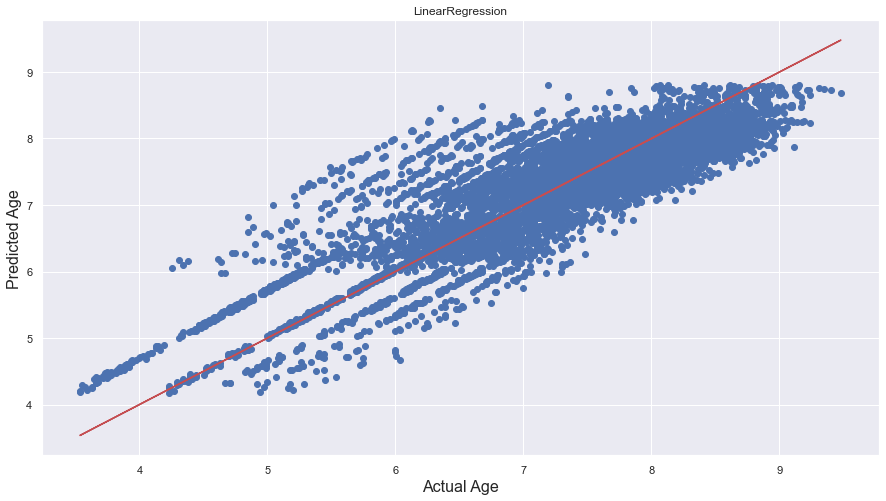

In [140]:
plt.figure(figsize = (15, 8))
plt.scatter(x = y, y  = final_model.predict(x), color = 'b')
plt.plot(y, y, color = 'r')
plt.xlabel('Actual Age', fontsize = 16)
plt.ylabel('Predicted Age', fontsize = 16)
plt.title('LinearRegression')
plt.show()

## Deploy Model

In [141]:
import pickle
filename = 'sale_prediction_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))

## Loading Model

In [142]:
load_model =  pickle.load(open('sale_prediction_model.pkl', 'rb'))
result = load_model.score(x, y)
print(result)

# 0.7410158202709423

0.7410158202709423


##  Conclusion

In [143]:
conclusion = pd.DataFrame()
predicted_sales = np.array(load_model.predict(x))
original_sales = np.array(y)

In [144]:
conclusion = pd.DataFrame({'original_sales': original_sales, 'predicted_sales': predicted_sales}, index = range(len(original_sales)))
conclusion

original_sales  predicted_sales
0           8.225808         8.213780
1           6.096776         6.373552
2           7.648868         7.631335
3           6.597664         5.932700
4           6.903451         6.615508
5           6.323658         6.429880
6           5.842247         6.695205
7           8.299973         7.875320
8           6.982490         7.262244
9           8.457769         7.939188
10          7.324508         6.475928
11          7.690813         7.665117
12          7.371656         7.674801
13          7.671458         7.474898
14          7.590057         7.931541
15          7.344925         6.707529
16          7.391963         7.242234
17          6.578415         6.670913
18          7.742692         7.933660
19          7.919146         8.133685
20          8.236443         8.198654
21          8.310180         8.191794
22          7.370399         7.974951
23          5.372439         5.414165
24          8.313613         7.804012
25          6.733292         6.491673
26          6.971931         6.420052
27          5.736350         6.294533
28          5.189810         4.518826
29          4.842896         4.512041
30          5.104653         4.709083
31          7.916722         7.059282
32          8.029109         8.057286
33          7.685015         7.205203
34          7.643141         7.854837
35          8.240666         7.672795
36          7.936907         8.067837
37          7.384551         7.321993
38          5.963994         6.805922
39          7.687766         7.664009
40          8.142217         8.131727
41          7.673936         7.476287
42          7.835333         7.948332
43          8.820186         8.070260
44          5.925629         7.496270
45          5.883880         5.894032
46          7.795580         7.720247
47          8.668385         8.277718
48          7.854632         6.781451
49          6.660982         6.048218
50          8.050571         7.652843
51          6.747460         7.595193
52          6.699432         7.416773
53          8.046316         7.969013
54          8.479713         7.707926
55          8.741859         8.026287
56          7.658343         7.344101
57          6.682062         6.302150
58          8.499289         7.956797
59          6.794779         5.940514
60          8.066580         8.017475
61          6.969430         7.155597
62          6.185596         6.824663
63          5.002654         4.670747
64          7.841633         8.761872
65          5.222659         5.935397
66          8.490164         7.836408
67          7.020677         7.929320
68          7.742114         7.796711
69          7.614983         7.237209
70          8.142217         7.835563
71          6.397296         6.722341
72          8.435044         7.788838
73          7.734570         7.933055
74          8.627255         8.237636
75          7.736897         7.425330
76          7.096800         7.832627
77          6.467951         5.230627
78          7.370818         7.327219
79          8.576611         8.097453
80          7.437672         7.294259
81          7.264363         7.895042
82          8.454230         7.737282
83          6.370313         6.025691
84          8.036889         8.366365
85          7.816191         7.878313
86          7.907454         7.765160
87          8.097646         8.269721
88          6.496481         7.245749
89          7.329324         7.438286
90          5.914905         5.507791
91          6.538769         6.350239
92          7.231674         6.679462
93          6.435386         6.721211
94          7.150969         7.421846
95          6.191064         5.525179
96          7.116987         8.198182
97          8.231140         7.937188
98          8.381294         8.218917
99          7.181812         7.936972
100         7.499229         7.699952
101         7.957160         8.408344
102         8.268029         7.888010
103         6.505481         6.301810
104         8.06

## Prediction for test data

In [150]:
import math

In [145]:
test_data_prediction = np.array(load_model.predict(test))  # predictiction for test data

In [147]:
test.shape

# (5681, 18)

(5681, 18)

In [148]:
test['Transformed sales'] = test_data_prediction   # This is transformed data we are getting

In [152]:
test['Predicted sales'] = test['Transformed sales'].apply(lambda x: math.exp(x) -1)
# Have applied reverse transformation to get it original value

In [155]:
test.drop(columns = 'Transformed sales', inplace = True)

In [157]:
test

Item_Weight  Item_Visibility  Item_Type  Item_MRP  Outlet_Identifier  \
0          20.750         0.086976         13  4.690083                  9   
1           8.300         0.196030          4  4.480964                  2   
2          14.600         0.315555         11  5.492048                  0   
3           7.315         0.124050         13  5.050074                  2   
4          12.600         0.344383          4  5.460564                  5   
5           9.800         0.252621          6  4.771948                  8   
6          19.350         0.287405          0  3.933851                  3   
7          12.600         0.125628          0  4.407441                  5   
8           6.305         0.351234         13  4.572064                  7   
9           5.985         0.075488          0  5.235869                  2   
10         16.600         0.321821          6  4.782032                  2   
11          6.590         0.325287          6  4.458881                  7   
12         12.600         0.413617          8  5.486536                  4   
13          4.785         0.304529          1  4.814700                  9   
14         16.750         0.145624          7  3.970854                  1   
15          6.135         0.281870          0  5.028060                  9   
16         19.850         0.232670         12  5.297201                  7   
17         17.850         0.194887         14  5.263823                  3   
18         12.600         0.167882          9  4.706744                  5   
19         13.600         0.443731         13  5.271530                  0   
20          7.100         0.331542          6  5.170529                  1   
21         19.200         0.427340         11  5.484463                  6   
22         13.650         0.256185          5  3.886504                  8   
23         12.600         0.165672         11  4.965268                  4   
24         19.200         0.187560         13  5.202532                  6   
25          6.785         0.196100         13  5.349451                  0   
26         13.000         0.187356          9  3.883693                  6   
27          5.825         0.302465          9  5.089997                  8   
28         13.800         0.241045          4  5.504031                  8   
29         12.800         0.151461          6  4.766857                  6   
30         12.600         0.259570          9  3.499231                  4   
31          9.500         0.148824         10  5.277835                  3   
32         12.500         0.082418          9  3.770717                  3   
33         12.600         0.157702          6  5.387933                  5   
34          5.780         0.311338          1  5.107491                  2   
35         12.600         0.093240         10  5.328352                  5   
36         12.600         0.281001          3  4.398938                  5   
37         10.395         0.224676          0  4.745085                  0   
38         18.350         0.299142          9  5.263469                  2   
39         12.600         0.126263          9  4.648195                  5   
40         21.100         0.170667          9  4.972439                  3   
41         19.750         0.263128          6  4.767685                  0   
42          8.430         0.422729          9  5.164456                  2   
43         15.350         0.125460         11  4.982558                  3   
44          6.710         0.244060          1  5.385488                  0   
45         10.195         0.355356          3  4.729055                  1   
46         11.650         0.539743          4  4.040061                  0   
47         12.850         0.231158          8  5.216352                  6   
48         12.150         0.362153          5  5.518039                  6   
49         18.250         0.274217         13  4.835524                  8   
50          5.980         0.